# Evaluation metrics (multiclass)

# load library



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load dataset

In [11]:
dataobj = load_iris()

X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

df = X
df['target'] = y

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: xlabel='target'>

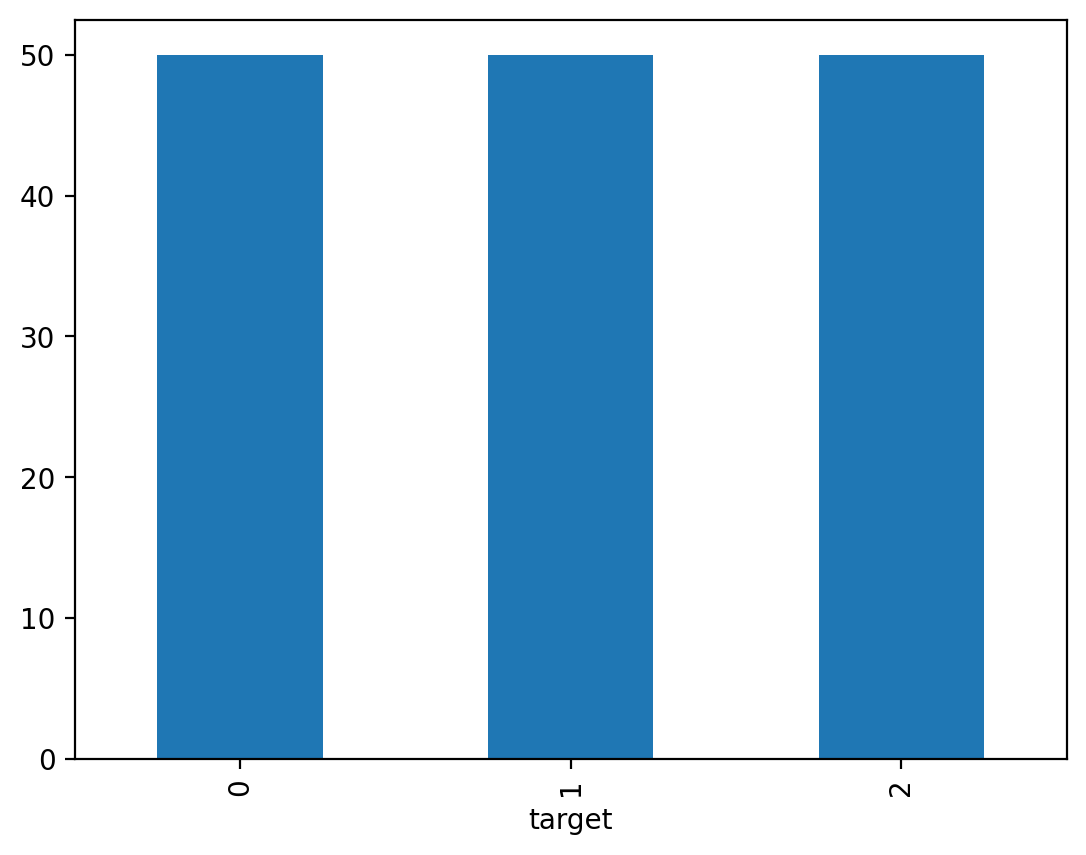

In [21]:
df.target.value_counts().plot(kind='bar')

# Split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 5)
X_test.shape = (45, 5)


# Pipline

In [26]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = LogisticRegression(random_state=1, max_iter=1000, solver='liblinear')

pipe = Pipeline([
    ('scl', scl),
    ('pca', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('clf',
                 LogisticRegression(max_iter=1000, random_state=1,
                                    solver='liblinear'))])

# Grid Search CV

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
pipe.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('pca', PCA(n_components=0.9)),
  ('clf',
   LogisticRegression(max_iter=1000, random_state=1, solver='liblinear'))],
 'verbose': False,
 'scl': StandardScaler(),
 'pca': PCA(n_components=0.9),
 'clf': LogisticRegression(max_iter=1000, random_state=1, solver='liblinear'),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.9,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 1000,
 'clf__multi_class': 'auto',
 'clf__n_jobs': None,
 'clf__penalty': 'l2',
 'clf__random_state': 1,
 'clf__solver': 'liblinear',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_s

In [29]:
param_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    "clf__C" : param_range,
    "clf__penalty" : ['l1']
}

set2 = {
    "clf__C" : param_range,
    "clf__penalty" : ['l2']
}

param_grid = [set1, set2]

In [37]:
#from sklearn.metrics import make_scorer
#scorer = make_scorer(metrics.f1_score, pos_label = 0)
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1
)
gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=1,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__penalty': ['l1']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__penalty': ['l2']}])

In [38]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=1,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__penalty': ['l1']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__penalty': ['l2']}])

In [39]:
re = pd.DataFrame(gs.cv_results_)
re.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
6,0.001894,0.000521,0.000513,0.000025,100,l1,"{'clf__C': 100, 'clf__penalty': 'l1'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.00,1
7,0.002419,0.001069,0.000521,0.000039,1000,l1,"{'clf__C': 1000, 'clf__penalty': 'l1'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.00,1
15,0.003105,0.001669,0.000970,0.000843,1000,l2,"{'clf__C': 1000, 'clf__penalty': 'l2'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.00,1
5,0.002022,0.000884,0.000520,0.000034,10,l1,"{'clf__C': 10, 'clf__penalty': 'l1'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.99,0.03,4
14,0.002454,0.001020,0.000728,0.000457,100,l2,"{'clf__C': 100, 'clf__penalty': 'l2'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.98,0.04,5


In [40]:
print(f"Best Hyper Parameter = {gs.best_params_} ")

Best Hyper Parameter = {'clf__C': 100, 'clf__penalty': 'l1'} 


## Evlauation metrics

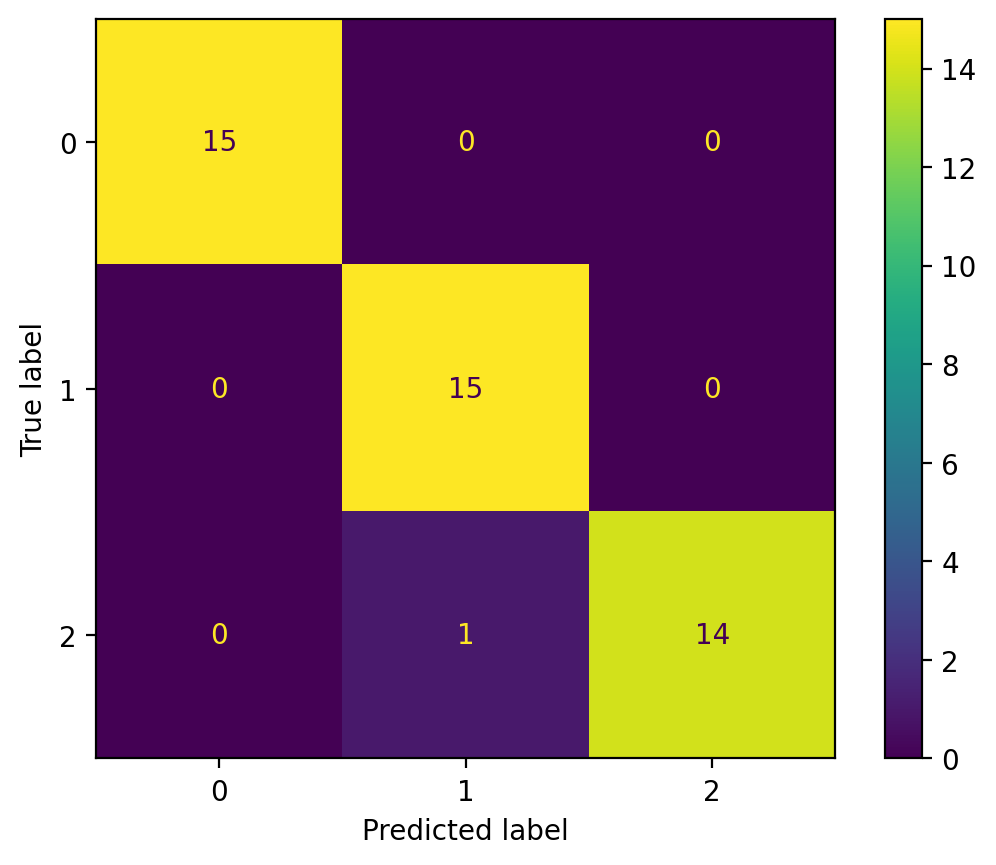

In [44]:
# confusion metrix 
y_pred = gs.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot();

In [45]:
## Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



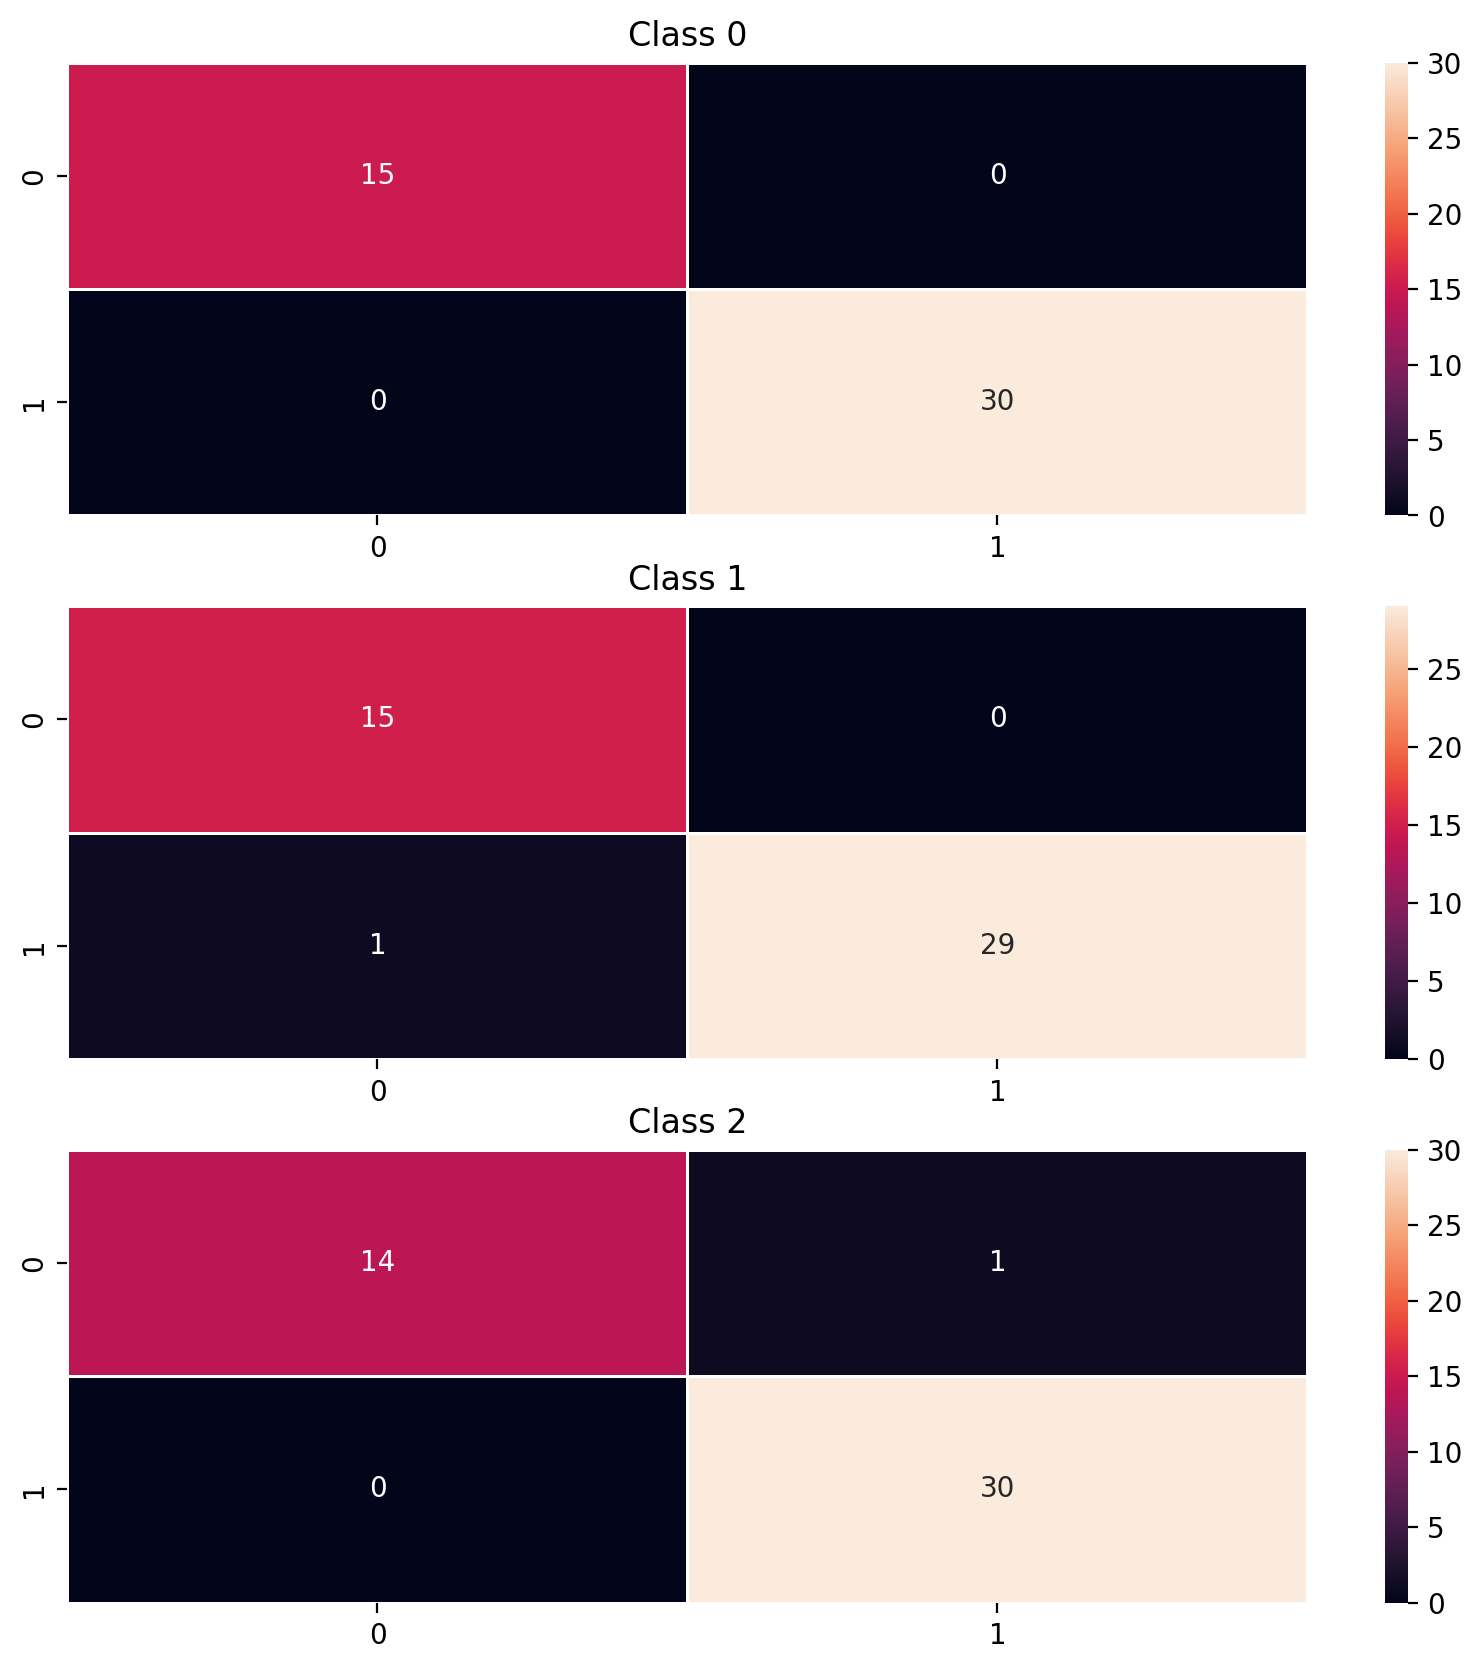

In [63]:
## mutilabel confusion metrix
cms = metrics.multilabel_confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax = ax.ravel()
for i, cm in enumerate(cms):
    #print(cm)
    sns.heatmap(np.flip(cm), ax=ax[i], annot=True, linewidths=.5)
    ax[i].set_title(f'Class {i}')

In [69]:
## finding weight, macro, micro average
vals = ['weighted', 'macro', 'micro']
for val in vals:
    print(f'{val} \n')
    print(f'Precision ({val}) = {metrics.precision_score(y_test, y_pred, average=val):6.3f}')
    print(f'Recall ({val}) = {metrics.recall_score(y_test, y_pred, average=val):6.3f}')
    print(f'F1 ({val}) = {metrics.f1_score(y_test, y_pred, average=val):6.3f} \n')
    print('--'*50 + '\n')

weighted 

Precision (weighted) =  0.979
Recall (weighted) =  0.978
F1 (weighted) =  0.978 

----------------------------------------------------------------------------------------------------

macro 

Precision (macro) =  0.979
Recall (macro) =  0.978
F1 (macro) =  0.978 

----------------------------------------------------------------------------------------------------

micro 

Precision (micro) =  0.978
Recall (micro) =  0.978
F1 (micro) =  0.978 

----------------------------------------------------------------------------------------------------

